In [4]:
import geopandas as gpd
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon
from pathlib import Path

In [20]:
#get the 2010 census tracts in NYC
#https://s3.amazonaws.com/tripdata/index.html for the trip data
cenTract = gpd.read_file('../Data/NYC/CensusTracts/NYC_Census_Tracts_for_2010_US_Census/NYC_Census_Tracts_for_2010_US_Census.shp')

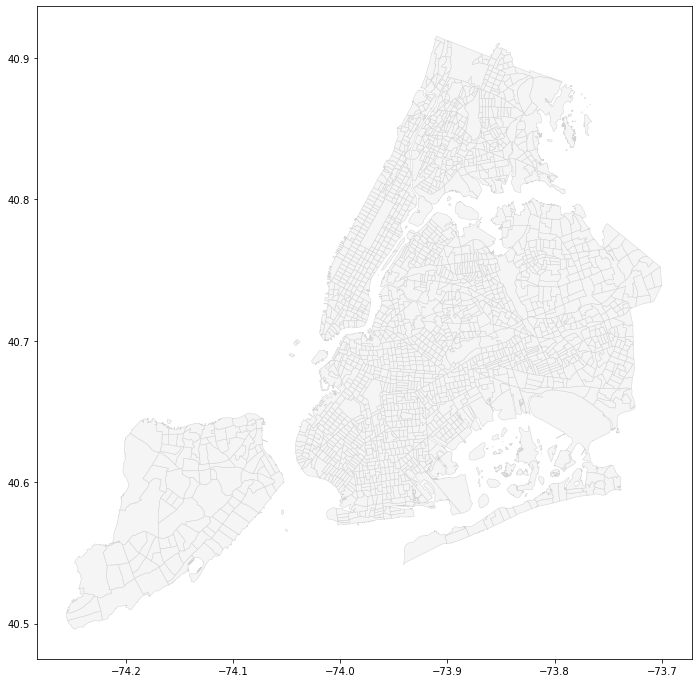

In [26]:
ax = cenTract.plot(figsize = (15, 12), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)

In [27]:
#removing staten island census tracts because they are not in the bike data
cenTract = cenTract[cenTract['BoroName'] != 'Staten Island']

In [28]:
cenTract

,OBJECTID,CTLabel,BoroCode,BoroName,CT2010,BoroCT2010,CDEligibil,NTACode,NTAName,PUMA,Shape__Are,Shape__Len,geometry
1,2,98,1,Manhattan,009800,1009800,I,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,5534.199811,"POLYGON ((-73.96433 40.75639, -73.96479 40.755..."
2,3,102,1,Manhattan,010200,1010200,I,MN17,Midtown-Midtown South,3807,1.860993e+06,5687.802439,"POLYGON ((-73.97124 40.76094, -73.97170 40.760..."
3,4,104,1,Manhattan,010400,1010400,I,MN17,Midtown-Midtown South,3807,1.864600e+06,5693.036367,"POLYGON ((-73.97446 40.76230, -73.97492 40.761..."
4,5,113,1,Manhattan,011300,1011300,I,MN17,Midtown-Midtown South,3807,1.890907e+06,5699.860641,"POLYGON ((-73.98412 40.75485, -73.98460 40.754..."
5,6,114.02,1,Manhattan,011402,1011402,I,MN40,Upper East Side-Carnegie Hill,3805,1.063547e+06,4125.256029,"POLYGON ((-73.96476 40.76407, -73.96521 40.763..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2160,2161,48,1,Manhattan,004800,1004800,I,MN21,Gramercy,3808,1.920852e+06,5539.378859,"POLYGON ((-73.98021 40.73439, -73.98038 40.734..."
2161,2162,506,3,Brooklyn,050600,3050600,E,BK42,Flatbush,4015,1.771606e+06,6696.151115,"POLYGON ((-73.96219 40.64980, -73.96308 40.649..."
2162,2163,508.01,3,Brooklyn,050801,3050801,E,BK42,Flatbush,4015,8.437396e+05,3754.807787,"POLYGON ((-73.95871 40.65040, -73.95998 40.650..."
2163,2164,157,1,Manhattan,015700,1015700,I,MN14,Lincoln Square,3806,1.958587e+06,5778.309362,"POLYGON ((-73.97500 40.77754, -73.97546 40.776..."


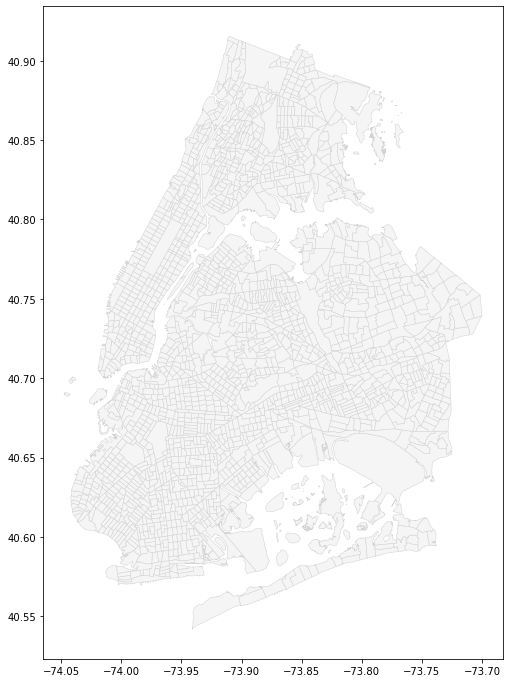

In [29]:
ax = cenTract.plot(figsize = (15, 12), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)

In [30]:
#get the station locations from June 2013
nyc_201306_df = pd.read_csv('../Data/NYC/TripData/201306-citibike-tripdata.csv')
nyc_201306_df

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,695,6/1/13 0:00,6/1/13 0:11,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,19678,Subscriber,1983.0,1
1,693,6/1/13 0:00,6/1/13 0:11,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,16649,Subscriber,1984.0,1
2,2059,6/1/13 0:00,6/1/13 0:35,406,Hicks St & Montague St,40.695128,-73.995951,406.0,Hicks St & Montague St,40.695128,-73.995951,19599,Customer,NaN,0
3,123,6/1/13 0:01,6/1/13 0:03,475,E 15 St & Irving Pl,40.735243,-73.987586,262.0,Washington Park,40.691782,-73.973730,16352,Subscriber,1960.0,1
4,1521,6/1/13 0:01,6/1/13 0:26,2008,Little West St & 1 Pl,40.705693,-74.016777,310.0,State St & Smith St,40.689269,-73.989129,15567,Subscriber,1983.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577698,925,6/30/13 23:59,7/1/13 0:14,509,9 Ave & W 22 St,40.745497,-74.001971,462.0,W 22 St & 10 Ave,40.746920,-74.004519,15250,Subscriber,1964.0,1
577699,279,6/30/13 23:59,7/1/13 0:04,116,W 17 St & 8 Ave,40.741776,-74.001497,494.0,W 26 St & 8 Ave,40.747348,-73.997236,19411,Customer,NaN,0
577700,161,6/30/13 23:59,7/1/13 0:02,443,Bedford Ave & S 9 St,40.708531,-73.964090,282.0,Kent Ave & S 11 St,40.707645,-73.968415,18910,Subscriber,1972.0,2
577701,909,6/30/13 23:59,7/1/13 0:14,509,9 Ave & W 22 St,40.745497,-74.001971,462.0,W 22 St & 10 Ave,40.746920,-74.004519,16108,Customer,NaN,0


In [31]:
stations_201306_df = nyc_201306_df.drop_duplicates(subset='start_station_id')
stations_201306_df = stations_201306_df.reset_index()
stations_201306_df = stations_201306_df.drop(columns=['index', 'tripduration', 'starttime', 'stoptime', 'bikeid',
                                                      'usertype','birth_year','gender','end_station_id', 'end_station_name',
                                                     'end_station_latitude', 'end_station_longitude'])
stations_201306_df = stations_201306_df.rename(columns = {'start_station_id':'station_id', 'start_station_name': 'station_name',
                                                         'start_station_latitude': 'lat', 'start_station_longitude': 'long'})
stations_201306_df

,station_id,station_name,lat,long
0,444,Broadway & W 24 St,40.742354,-73.989151
1,406,Hicks St & Montague St,40.695128,-73.995951
2,475,E 15 St & Irving Pl,40.735243,-73.987586
3,2008,Little West St & 1 Pl,40.705693,-74.016777
4,485,W 37 St & 5 Ave,40.750380,-73.983390
...,...,...,...,...
332,248,Laight St & Hudson St,40.721854,-74.007718
333,387,Centre St & Chambers St,40.712733,-74.004607
334,3000,MLSWKiosk,40.755467,-73.986536
335,160,E 37 St & Lexington Ave,40.748158,-73.978462


In [32]:
end_stations_201306_df = nyc_201306_df.drop_duplicates(subset='end_station_id')
end_stations_201306_df = end_stations_201306_df.reset_index()
end_stations_201306_df = end_stations_201306_df.drop(columns=['index', 'tripduration', 'starttime', 'stoptime', 
                                                              'bikeid','usertype','birth_year','gender', 'start_station_id',
                                                             'start_station_name','start_station_latitude','start_station_longitude'])
end_stations_201306_df = end_stations_201306_df.rename(columns={'end_station_id':'station_id', 'end_station_name': 'station_name',
                                                               'end_station_latitude': 'lat', 'end_station_longitude': 'long'})
end_stations_201306_df

,station_id,station_name,lat,long
0,434.0,9 Ave & W 18 St,40.743174,-74.003664
1,406.0,Hicks St & Montague St,40.695128,-73.995951
2,262.0,Washington Park,40.691782,-73.973730
3,310.0,State St & Smith St,40.689269,-73.989129
4,532.0,S 5 Pl & S 5 St,40.710451,-73.960876
...,...,...,...,...
333,431.0,Hanover Pl & Livingston St,40.688646,-73.982634
334,3000.0,MLSWKiosk,40.755467,-73.986536
335,409.0,DeKalb Ave & Skillman St,40.690649,-73.956431
336,160.0,E 37 St & Lexington Ave,40.748158,-73.978462


In [33]:
nyc_201306_stations_df = pd.concat([stations_201306_df, end_stations_201306_df])
nyc_201306_stations_df = nyc_201306_stations_df.drop_duplicates(subset='station_id')
nyc_201306_stations_df = nyc_201306_stations_df.reset_index()
nyc_201306_stations_df = nyc_201306_stations_df.drop(columns=['index'])
nyc_201306_stations_df = nyc_201306_stations_df.drop(337)
nyc_201306_stations_df

,station_id,station_name,lat,long
0,444.0,Broadway & W 24 St,40.742354,-73.989151
1,406.0,Hicks St & Montague St,40.695128,-73.995951
2,475.0,E 15 St & Irving Pl,40.735243,-73.987586
3,2008.0,Little West St & 1 Pl,40.705693,-74.016777
4,485.0,W 37 St & 5 Ave,40.750380,-73.983390
...,...,...,...,...
332,248.0,Laight St & Hudson St,40.721854,-74.007718
333,387.0,Centre St & Chambers St,40.712733,-74.004607
334,3000.0,MLSWKiosk,40.755467,-73.986536
335,160.0,E 37 St & Lexington Ave,40.748158,-73.978462


In [34]:
nyc_201306_stations_df.to_csv('../Data/NYC/nyc_201306_stations.csv')

In [35]:
#convert hr_df to geodataframe to plot the bike stations on map
geometry = [Point(xy) for xy in zip(nyc_201306_stations_df.long, nyc_201306_stations_df.lat)]
crs = 4326
nyc_201306_gdf = gpd.GeoDataFrame(nyc_201306_stations_df, crs=crs, geometry=geometry)

Text(0.5, 1.0, 'June 2013: Citi Bike Station Locations - New York City')

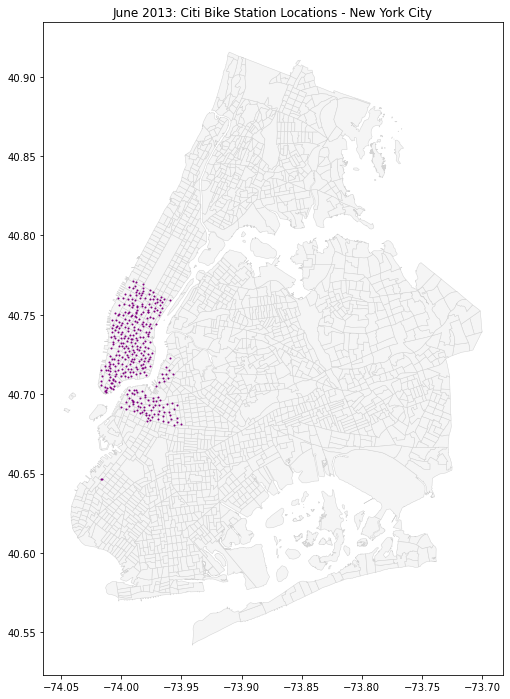

In [49]:
ax = cenTract.plot(figsize = (15, 12), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)
nyc_201306_gdf.plot(ax=ax, color="Purple", markersize=1)
plt.title("June 2013: Citi Bike Station Locations - New York City")

In [1]:
def geoify_df(station_df):
    #convert hr_df to geodataframe to plot the bike stations on map
    geometry = [Point(xy) for xy in zip(station_df.long, station_df.lat)]
    crs = 4326
    station_gdf = gpd.GeoDataFrame(station_df, crs=crs, geometry=geometry)
    return station_gdf

In [40]:
def station_df(list_df, filenames=['nyc_stations.csv']):
    filtered_gdf = []
    count = 0
    
    #for every df in the list of df sent in
    for df in list_df:
        print("file: " + filenames[count])
        df.columns = df.columns.str.lower()
        #rename all of the columns to get rid of spaces
        df = df.rename(columns={'start station id': 'start_station_id', 'start station name': 'start_station_name',
                                       'start station latitude': 'start_station_latitude', 
                                        'start station longitude': 'start_station_longitude', 
                                       'end station id': 'end_station_id', 'end station name': 'end_station_name',
                                       'end station latitude': 'end_station_latitude', 
                                        'end station longitude': 'end_station_longitude', 'birth year': 'birth_year',
                                       'trip duration': 'tripduration', 'start time': 'starttime', 'stop time': 'stoptime',
                                        'bike id': 'bikeid', 'user type': 'usertype'})
        
        try:
            df['start_station_id'] = df.start_station_id.astype(float)
            df['end_station_id'] = df.start_station_id.astype(float)
        except:
            print("unable to convert station id to float")
        ##filter for start station locations
        stations_df = df.drop_duplicates(subset='start_station_id')
        stations_df = stations_df.reset_index()
        stations_df = stations_df.drop(columns=['index', 'tripduration', 'starttime', 'stoptime', 'bikeid',
                                                      'usertype','birth_year','gender','end_station_id', 'end_station_name',
                                                     'end_station_latitude', 'end_station_longitude'])
        stations_df = stations_df.rename(columns = {'start_station_id':'station_id', 'start_station_name': 'station_name',
                                                         'start_station_latitude': 'lat', 'start_station_longitude': 'long'})
        ## filter for end station locations
        end_stations_df = df.drop_duplicates(subset='end_station_id')
        end_stations_df = end_stations_df.reset_index()
        end_stations_df = end_stations_df.drop(columns=['index', 'tripduration', 'starttime', 'stoptime', 
                                                              'bikeid','usertype','birth_year','gender', 'start_station_id',
                                                             'start_station_name','start_station_latitude','start_station_longitude'])
        end_stations_df = end_stations_df.rename(columns={'end_station_id':'station_id', 'end_station_name': 'station_name',
                                                               'end_station_latitude': 'lat', 'end_station_longitude': 'long'})

        #concat the two dataframes together and drop duplicates once more
        nyc_stations_df = pd.concat([stations_df, end_stations_df])
        nyc_stations_df = nyc_stations_df.drop_duplicates(subset='station_id')
        nyc_stations_df = nyc_stations_df.reset_index()
        nyc_stations_df = nyc_stations_df.drop(columns=['index'])

        #save the data frame
        try:
            nyc_stations_df.to_csv('../Data/NYC/stations/'+filenames[count])
        except:
            print('Cannot convert dataframe to csv.')
        
        filtered_gdf.append(geoify_df(nyc_stations_df))
        count += 1
        
    return filtered_gdf

## Showing Growth of System over time

In [56]:
#set path to access all json files in January folder
data_dir = Path('../Data/NYC') / 'TripData/2020'
data_files = data_dir.glob('*.csv')

list_df = []
filenames = []

for file in data_files:
    print(file)
    df = pd.read_csv(file, low_memory=False)
    list_df.append(df)
    filepath = str(file).split('/')
    filename = filepath[5]
    filenames.append(filename)
    
filtered_gdf = station_df(list_df, filenames)

../Data/NYC/TripData/2020/202006-citibike-tripdata.csv
../Data/NYC/TripData/2020/202010-citibike-tripdata.csv
../Data/NYC/TripData/2020/202004-citibike-tripdata.csv
../Data/NYC/TripData/2020/202012-citibike-tripdata.csv
../Data/NYC/TripData/2020/202002-citibike-tripdata.csv
../Data/NYC/TripData/2020/202008-citibike-tripdata.csv
../Data/NYC/TripData/2020/202011-citibike-tripdata.csv
../Data/NYC/TripData/2020/202007-citibike-tripdata.csv
../Data/NYC/TripData/2020/202005-citibike-tripdata.csv
../Data/NYC/TripData/2020/202003-citibike-tripdata.csv
../Data/NYC/TripData/2020/202009-citibike-tripdata.csv
../Data/NYC/TripData/2020/202001-citibike-tripdata.csv
file: 202006-citibike-tripdata.csv
file: 202010-citibike-tripdata.csv
file: 202004-citibike-tripdata.csv
file: 202012-citibike-tripdata.csv
file: 202002-citibike-tripdata.csv
file: 202008-citibike-tripdata.csv
file: 202011-citibike-tripdata.csv
file: 202007-citibike-tripdata.csv
file: 202005-citibike-tripdata.csv
file: 202003-citibike-tri

### Save these as images

In [57]:
filenames

['202006-citibike-tripdata.csv',
 '202010-citibike-tripdata.csv',
 '202004-citibike-tripdata.csv',
 '202012-citibike-tripdata.csv',
 '202002-citibike-tripdata.csv',
 '202008-citibike-tripdata.csv',
 '202011-citibike-tripdata.csv',
 '202007-citibike-tripdata.csv',
 '202005-citibike-tripdata.csv',
 '202003-citibike-tripdata.csv',
 '202009-citibike-tripdata.csv',
 '202001-citibike-tripdata.csv']

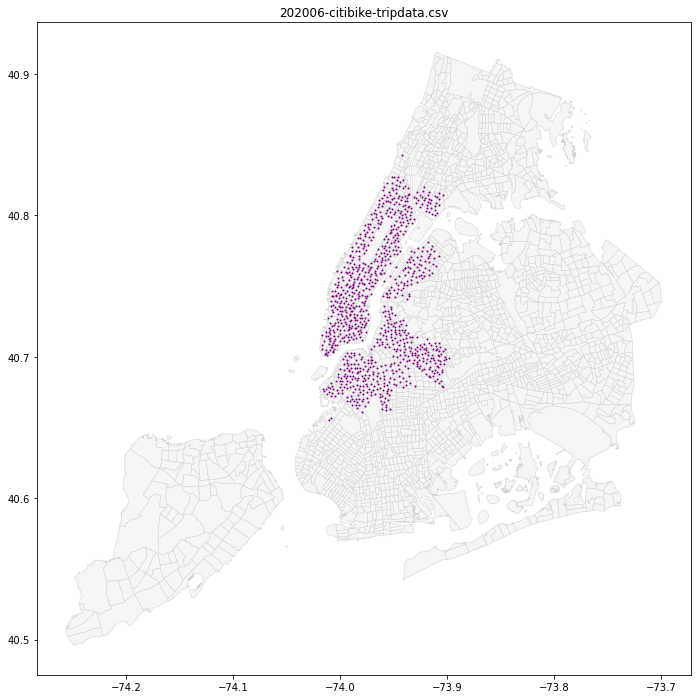

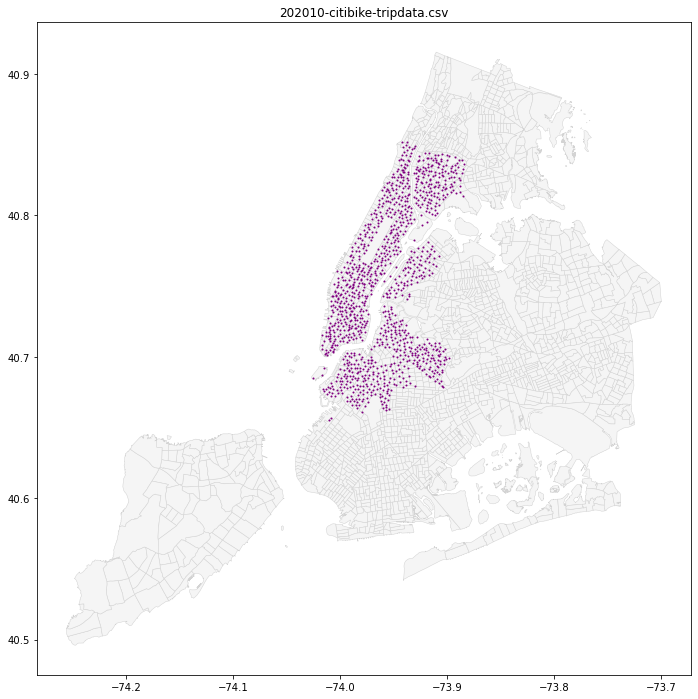

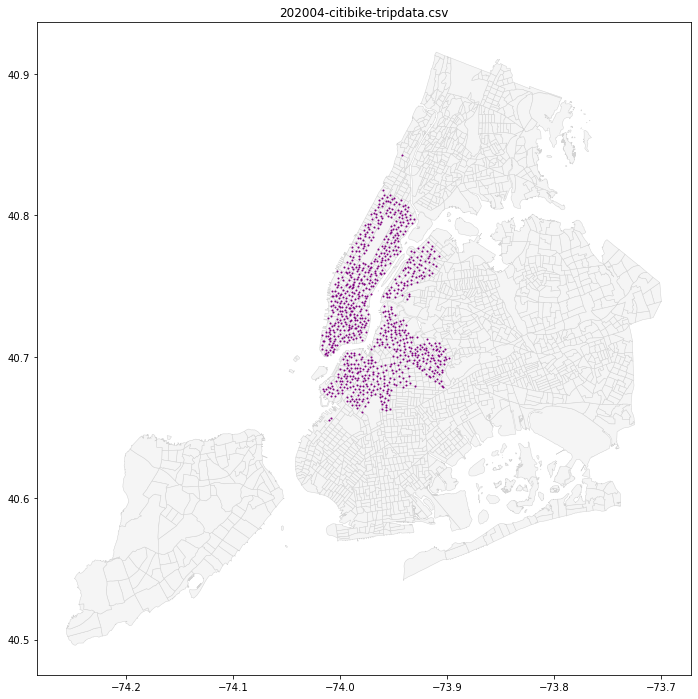

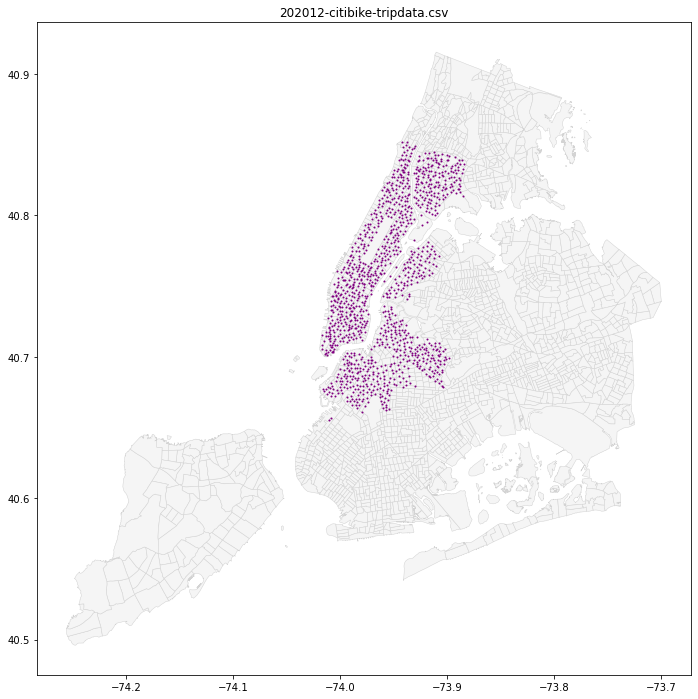

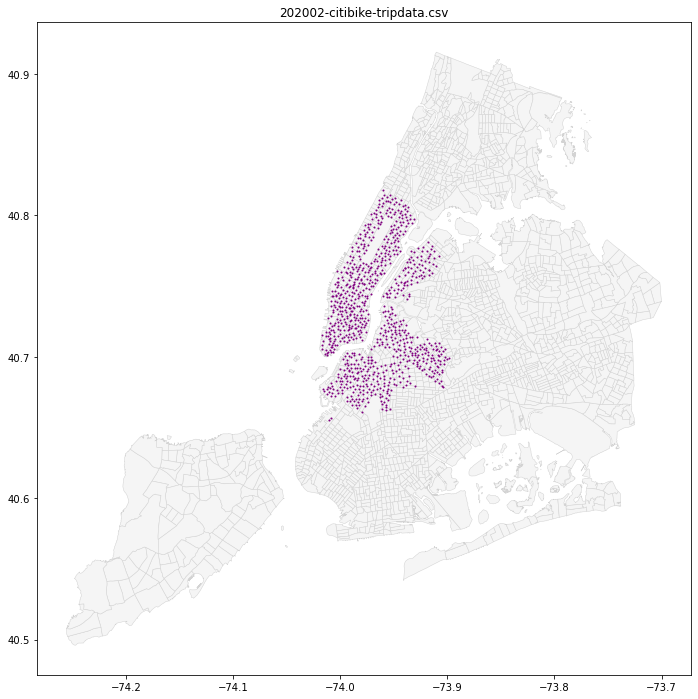

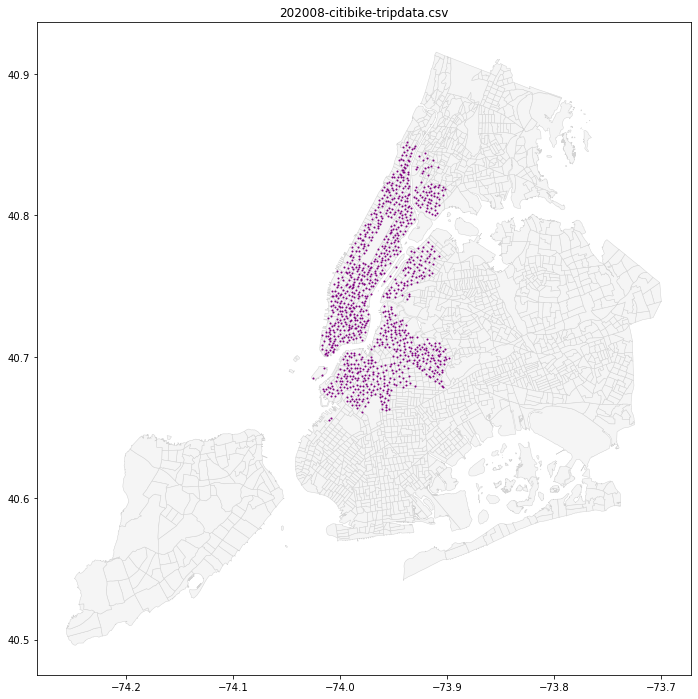

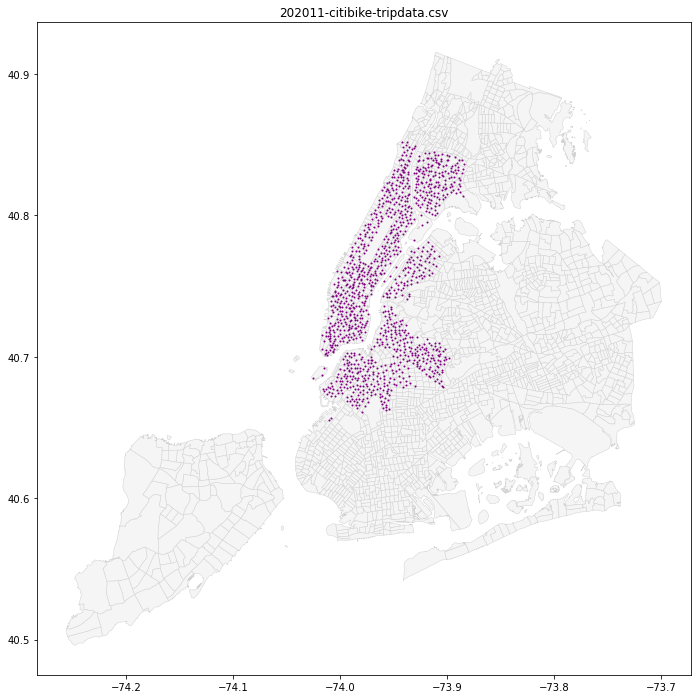

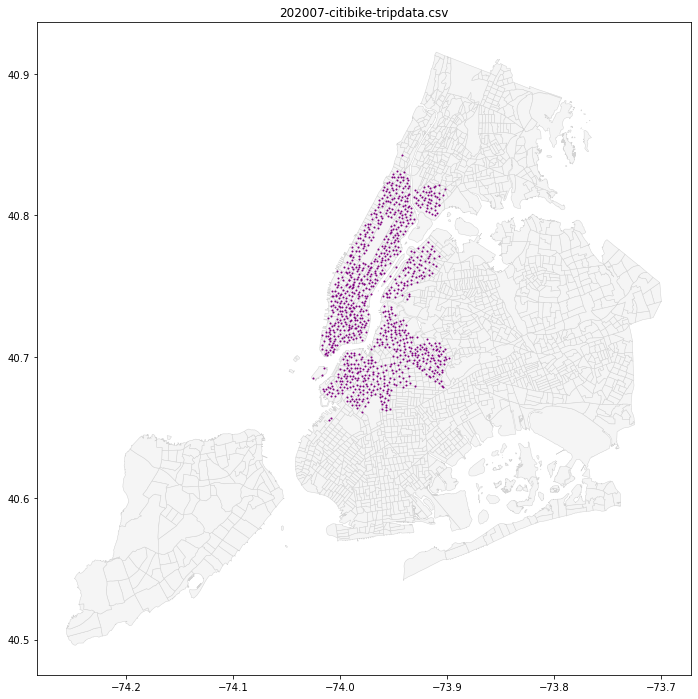

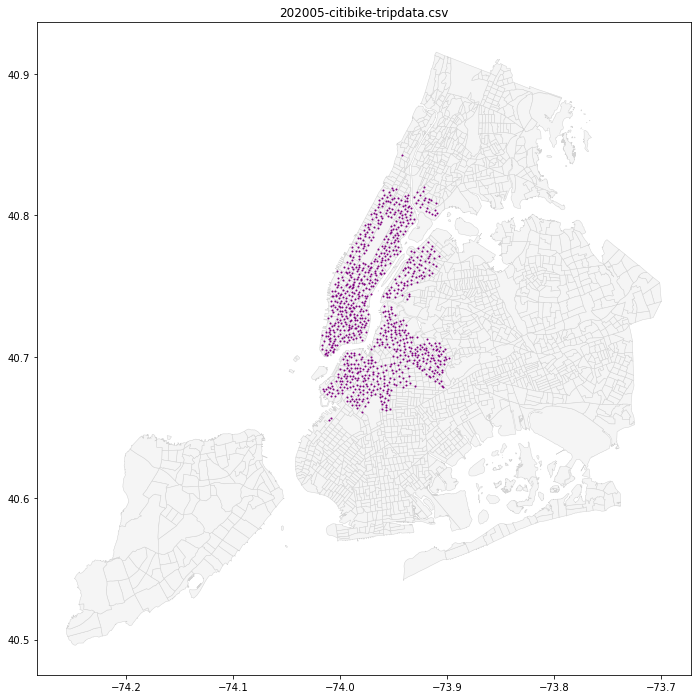

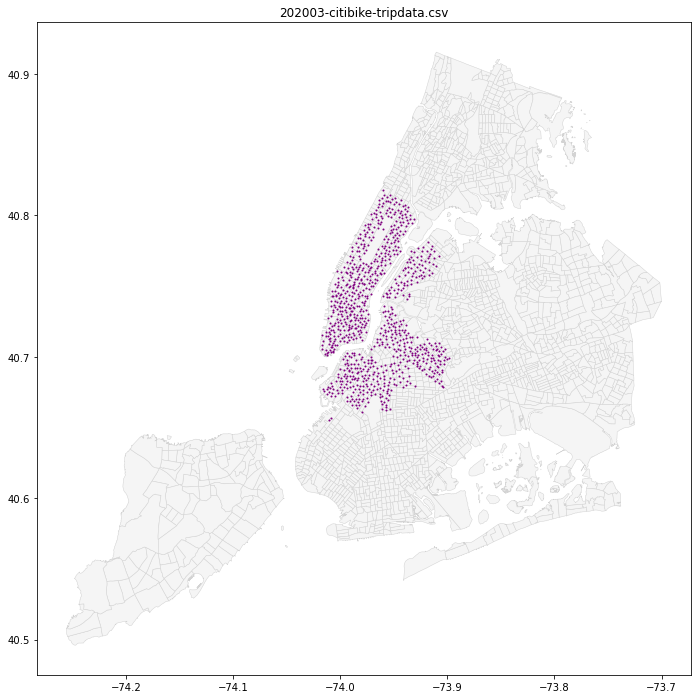

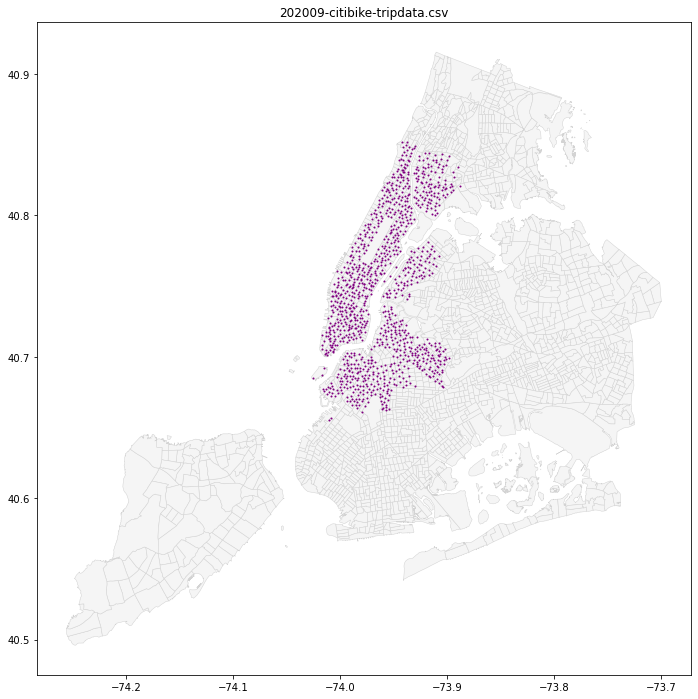

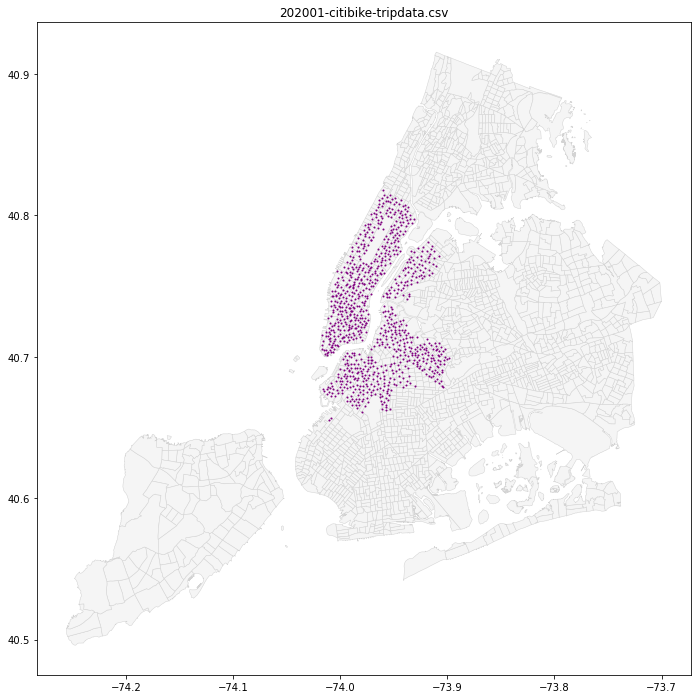

In [58]:
count = 0
for df in filtered_gdf:
    ax = cenTract.plot(figsize = (15, 12), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)
    result = df.plot(ax=ax, color="Purple", markersize=1)
    plt.title(filenames[count])
    resultFig = result.get_figure()
    resultFig.savefig("../Results/stations_nyc/stations_" + filenames[count] + ".png")
    count+=1

In [59]:
from PIL import Image
import glob
 
# Create the frames
frames = []
imgs = glob.glob("../Results/stations_nyc/*.png")
imgs = sorted(imgs)

for i in imgs:
    print(i)
    new_frame = Image.open(i)
    frames.append(new_frame)
 
# Save into a GIF file that loops forever
frames[0].save('../Results/stations_nyc/stations_gif.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=900, loop=10)

../Results/stations_nyc/stations_201306-citibike-tripdata.csv.png
../Results/stations_nyc/stations_201307-citibike-tripdata.csv.png
../Results/stations_nyc/stations_201308-citibike-tripdata.csv.png
../Results/stations_nyc/stations_201309-citibike-tripdata.csv.png
../Results/stations_nyc/stations_201310-citibike-tripdata.csv.png
../Results/stations_nyc/stations_201311-citibike-tripdata.csv.png
../Results/stations_nyc/stations_201312-citibike-tripdata.csv.png
../Results/stations_nyc/stations_201401-citibike-tripdata.csv.png
../Results/stations_nyc/stations_201402-citibike-tripdata.csv.png
../Results/stations_nyc/stations_201403-citibike-tripdata.csv.png
../Results/stations_nyc/stations_201404-citibike-tripdata.csv.png
../Results/stations_nyc/stations_201405-citibike-tripdata.csv.png
../Results/stations_nyc/stations_201406-citibike-tripdata.csv.png
../Results/stations_nyc/stations_201411-citibike-tripdata.csv.png
../Results/stations_nyc/stations_201412-citibike-tripdata.csv.png
../Results

![gif](../Results/stations_nyc/stations_gif.gif)

In [ ]:
ax = cenTract.plot(figsize = (15, 12), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)
filtered_gdf[0].plot(ax=ax, color="Purple", markersize=1)
plt.title(filenames[0])

In [44]:
# if a bike station is not in the latest data set then remove the census tract from the shapefile
contains = []
for row, col in cenTract.iterrows():
    for row1, col1 in filtered_gdf[1].iterrows():
        if cenTract.loc[row]['geometry'].contains(filtered_gdf[1].loc[row1]['geometry']):
            contains.append(row)

filtered_cenTract = cenTract.copy()
            
for row, col in filtered_cenTract.iterrows():
    if row not in contains:
        filtered_cenTract = filtered_cenTract.drop(row)
        
filtered_cenTract

,OBJECTID,CTLabel,BoroCode,BoroName,CT2010,BoroCT2010,CDEligibil,NTACode,NTAName,PUMA,Shape__Are,Shape__Len,geometry
1,2,98,1,Manhattan,009800,1009800,I,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,5534.199811,"POLYGON ((-73.96433 40.75639, -73.96479 40.755..."
2,3,102,1,Manhattan,010200,1010200,I,MN17,Midtown-Midtown South,3807,1.860993e+06,5687.802439,"POLYGON ((-73.97124 40.76094, -73.97170 40.760..."
3,4,104,1,Manhattan,010400,1010400,I,MN17,Midtown-Midtown South,3807,1.864600e+06,5693.036367,"POLYGON ((-73.97446 40.76230, -73.97492 40.761..."
4,5,113,1,Manhattan,011300,1011300,I,MN17,Midtown-Midtown South,3807,1.890907e+06,5699.860641,"POLYGON ((-73.98412 40.75485, -73.98460 40.754..."
6,7,130,1,Manhattan,013000,1013000,I,MN40,Upper East Side-Carnegie Hill,3805,1.918145e+06,5807.972956,"POLYGON ((-73.96148 40.77433, -73.96194 40.773..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154,2155,131,2,Bronx,013100,2013100,E,BX33,Longwood,3710,2.477239e+06,6532.973101,"POLYGON ((-73.89484 40.82626, -73.89487 40.823..."
2159,2160,44,1,Manhattan,004400,1004400,I,MN50,Stuyvesant Town-Cooper Village,3808,4.277835e+06,9684.762936,"MULTIPOLYGON (((-73.97157 40.72770, -73.97157 ..."
2160,2161,48,1,Manhattan,004800,1004800,I,MN21,Gramercy,3808,1.920852e+06,5539.378859,"POLYGON ((-73.98021 40.73439, -73.98038 40.734..."
2163,2164,157,1,Manhattan,015700,1015700,I,MN14,Lincoln Square,3806,1.958587e+06,5778.309362,"POLYGON ((-73.97500 40.77754, -73.97546 40.776..."


Text(0.5, 1.0, '202101-citibike-tripdata.csv')

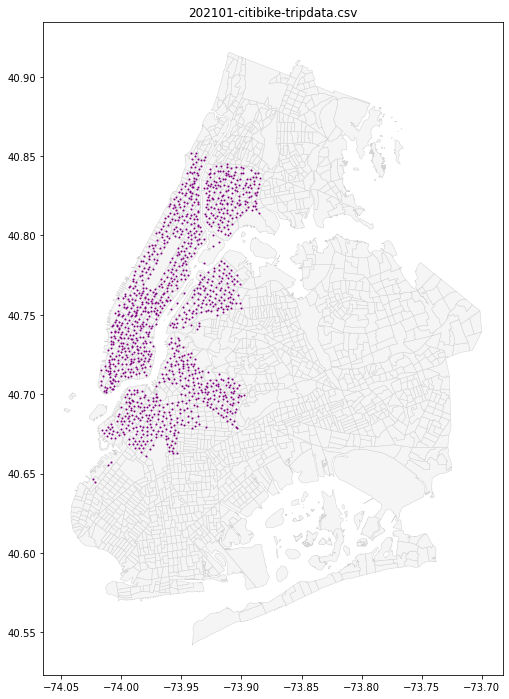

In [45]:
ax = cenTract.plot(figsize = (15, 12), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)
filtered_gdf[1].plot(ax=ax, color="Purple", markersize=1)
plt.title(filenames[1])

In [46]:
from cenpy import products
#https://api.census.gov/data/2019/acs/acs5/variables.html variables for census
NYC = products.ACS(2019).from_place('New York City, NY', level='tract',
                                   variables = ['B01003_001E', 'B02001_002E', 'B02001_003E', 'B02001_004E','B02001_005E',
                                               'B02001_006E','B02001_007E'])

/Users/katelyncmorrison/opt/anaconda3/envs/CURF/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



Matched: New York City, NY to New York city within layer Incorporated Places


In [47]:
NYC.head(5)

,GEOID,geometry,B01003_001E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,B02001_006E,B02001_007E,state,county,tract
0,36085017009,"POLYGON ((-8259606.540 4945204.550, -8259551.5...",4485.0,4198.0,0.0,0.0,188.0,0.0,0.0,36,085,017009
1,36085017012,"POLYGON ((-8257822.870 4945745.990, -8257700.4...",4321.0,3882.0,48.0,0.0,235.0,18.0,80.0,36,085,017012
2,36085017011,"POLYGON ((-8257258.590 4945434.980, -8257233.1...",4865.0,4732.0,2.0,0.0,69.0,0.0,0.0,36,085,017011
3,36085027302,"POLYGON ((-8253857.890 4952048.580, -8253853.3...",4060.0,3230.0,7.0,0.0,793.0,0.0,0.0,36,085,027302
4,36085021300,"POLYGON ((-8253987.250 4958121.700, -8253968.4...",4681.0,3062.0,776.0,228.0,283.0,0.0,158.0,36,085,021300


<AxesSubplot:>

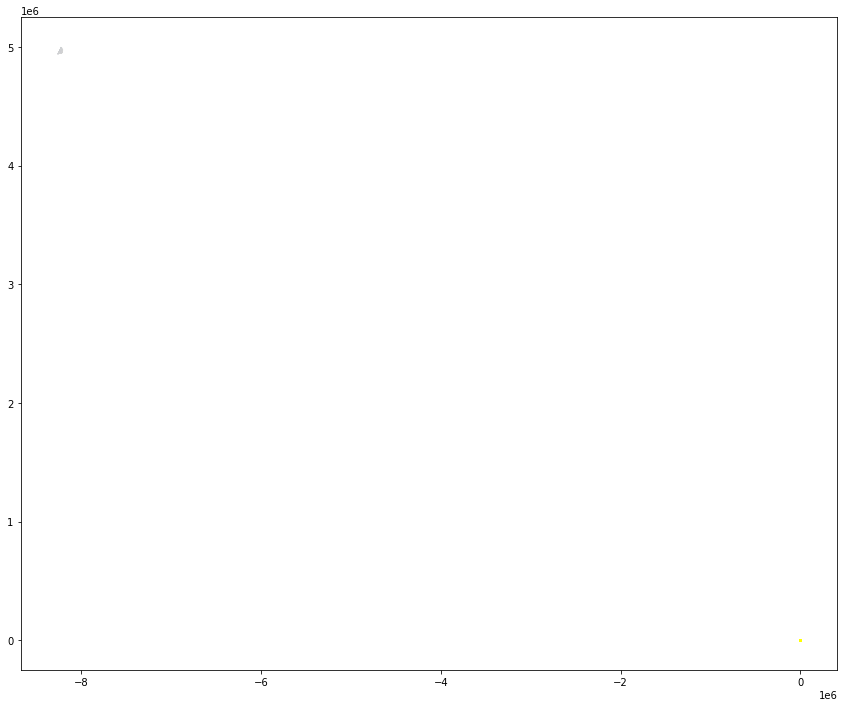

In [48]:
ax = NYC.plot(column = "B02001_002E", cmap="BuPu",figsize = (15, 12), edgecolor = "lightgrey", linewidth = 0.5)
filtered_gdf[1].plot(ax=ax, color="Yellow", markersize=1)

In [11]:
test = pd.read_csv('../Data/NYC/TripData/201701-citibike-tripdata.csv')

In [12]:
test

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,680,2017-01-01 00:00:21,2017-01-01 00:11:41,3226,W 82 St & Central Park West,40.782750,-73.971370,3165,Central Park West & W 72 St,40.775794,-73.976206,25542,Subscriber,1965.0,2
1,1282,2017-01-01 00:00:45,2017-01-01 00:22:08,3263,Cooper Square & E 7 St,40.729236,-73.990868,498,Broadway & W 32 St,40.748549,-73.988084,21136,Subscriber,1987.0,2
2,648,2017-01-01 00:00:57,2017-01-01 00:11:46,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,18147,Customer,NaN,0
3,631,2017-01-01 00:01:10,2017-01-01 00:11:42,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,21211,Customer,NaN,0
4,621,2017-01-01 00:01:25,2017-01-01 00:11:47,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,26819,Customer,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726671,340,2017-01-31 23:59:14,2017-02-01 00:04:55,267,Broadway & W 36 St,40.750977,-73.987654,527,E 33 St & 2 Ave,40.744023,-73.976056,17133,Subscriber,1977.0,1
726672,338,2017-01-31 23:59:23,2017-02-01 00:05:01,3092,Berry St & N 8 St,40.719009,-73.958525,3110,Meserole Ave & Manhattan Ave,40.727086,-73.952991,18810,Subscriber,1972.0,1
726673,79,2017-01-27 04:59:49,2017-01-27 05:01:08,3245,Kiosk in a box Motivate,40.646678,-74.016303,3245,Kiosk in a box Motivate,40.646678,-74.016303,24777,Subscriber,1992.0,1
726674,711,2017-01-27 06:23:29,2017-01-27 06:35:21,3245,Kiosk in a box Motivate,40.646678,-74.016303,3245,Kiosk in a box Motivate,40.646678,-74.016303,24777,Subscriber,1992.0,1


In [15]:
test.columns

Index(['Trip Duration', 'Start Time', 'Stop Time', 'Start Station ID',
       'Start Station Name', 'Start Station Latitude',
       'Start Station Longitude', 'End Station ID', 'End Station Name',
       'End Station Latitude', 'End Station Longitude', 'Bike ID', 'User Type',
       'Birth Year', 'Gender'],
      dtype='object')